<a href="https://colab.research.google.com/github/ogut77/DataScience/blob/main/BostingvsRFandDTreeClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
#
# Load the breast cancer data set
#
bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target

In [2]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
pd.DataFrame(y)

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [4]:
from sklearn.model_selection import train_test_split
#
# Create training and test split
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [5]:
print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of Y_train=>',y_train.shape)
print('Shape of Y_test=>',y_test.shape)

Shape of X_train=> (398, 30)
Shape of X_test=> (171, 30)
Shape of Y_train=> (398,)
Shape of Y_test=> (171,)


In [6]:
# Building Decision Tree
from sklearn import tree
dt = tree.DecisionTreeClassifier(criterion = 'entropy', random_state = 21)
dt.fit(X_train, y_train)
dt_pred_train = dt.predict(X_train)
dt_pred_test=dt.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score
print('Training Set Evaluation Accuracy score=> ', accuracy_score(y_train,dt_pred_train))
print('Testing Set Evaluation Accuracy score=>', accuracy_score(y_test,dt_pred_test))

Training Set Evaluation Accuracy score=>  1.0
Testing Set Evaluation Accuracy score=> 0.9005847953216374


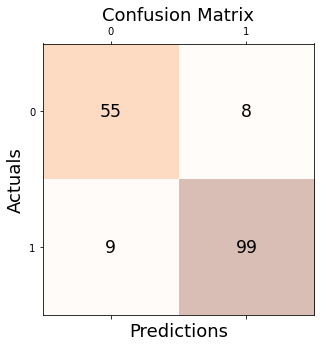

In [8]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_true=y_test, y_pred=dt_pred_test)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

True Positive (TP): True positive represents the value of correct predictions of positives out of actual positive cases. Out of ? actual positive, ? is correctly predicted positive. Thus, the value of True Positive is ?.

False Positive (FP): False positive represents the value of incorrect positive predictions. This value represents the number of negatives (out of ?) which gets falsely predicted as positive. Out of ? actual negative, ? is falsely predicted as positive. Thus, the value of False Positive is ?.

True Negative (TN): True negative represents the value of correct predictions of negatives out of actual negative cases. Out of ? actual negative, ? is correctly predicted negative. Thus, the value of True Negative is ?.

False Negative (FN): False negative represents the value of incorrect negative predictions. This value represents the number of positives (out of ?) which gets falsely predicted as negative. Out of ? actual positive, ? is falsely predicted as negative. Thus, the value of False Negative is ?.

In [9]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true=y_test, y_pred=dt_pred_test)
print(conf_matrix)
print(sum(y_test))
print(sum(dt_pred_test))

[[55  8]
 [ 9 99]]
108
107


In [10]:
from sklearn.metrics import accuracy_score
dt_pred_train = dt.predict(X_train)
print('Training Set Evaluation Accuracy score=>',accuracy_score(y_train,dt_pred_train))
# Evaluating on Test set
dt_pred_test = dt.predict(X_test)
print('Testing Set Evaluation Accuracy score=>',accuracy_score(y_test,dt_pred_test))

Training Set Evaluation Accuracy score=> 1.0
Testing Set Evaluation Accuracy score=> 0.9005847953216374


In [ ]:
#Calculate Recall Score on test data
print('Recall: ' + str(recall_score(y_test, dt_pred_test)))

Recall: 0.9166666666666666


No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.895


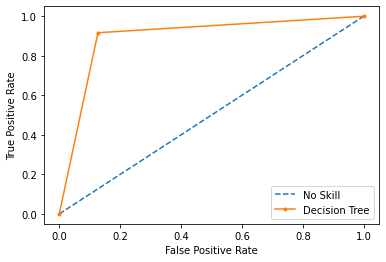

In [11]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
# fit a model

# predict probabilities
lr_probs = dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [14]:
# Building  Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(criterion = 'entropy', random_state = 21)
rfc.fit(X_train, y_train)

# Evaluating on Training set
rfc_pred_train = rfc.predict(X_train)
print('Training Set Evaluation Accuracy score=>',accuracy_score(y_train,rfc_pred_train))
# Evaluating on Test set
rfc_pred_test = rfc.predict(X_test)
print('Testing Set Evaluation Accuracy score=>',accuracy_score(y_test,rfc_pred_test))

Training Set Evaluation Accuracy score=> 1.0
Testing Set Evaluation Accuracy score=> 0.9415204678362573


In [13]:
#Calculate Recall Score on test data for Random Forest
print('Recall: ' + str(recall_score(y_test, rfc_pred_test)))

NameError: ignored

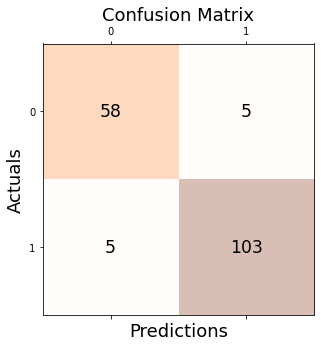

In [15]:
#Confusion Matrix for Random Forest
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_true=y_test, y_pred=rfc_pred_test)
#
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.979


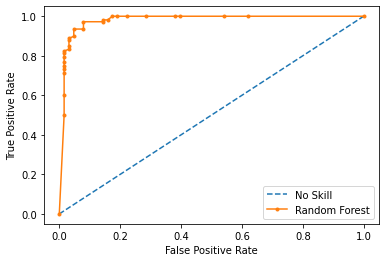

In [16]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
# fit a model

# predict probabilities
lr_probs = rfc.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.895
Random Forest: ROC AUC=0.979


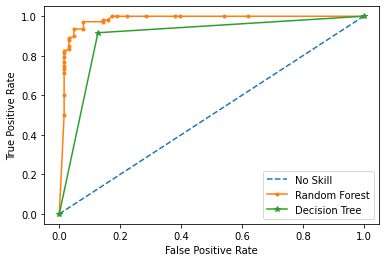

In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
# fit a model

# predict probabilities
lr_probs = rfc.predict_proba(X_test)
lr_probs1 = dt.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probs1 = lr_probs1[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
lr_auc1 = roc_auc_score(y_test, lr_probs1)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (lr_auc1))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_fpr1, lr_tpr1, _ = roc_curve(y_test, lr_probs1)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
pyplot.plot(lr_fpr1, lr_tpr1, marker='*', label='Decision Tree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [19]:
#Light GBM
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier(random_state=21)
lgb_model.fit(X_train, y_train)
# make predictions for test data
print(accuracy_score(y_test, lgb_model.predict(X_test)))
print(confusion_matrix(y_test, lgb_model.predict(X_test))) 

0.9707602339181286
[[ 59   4]
 [  1 107]]


In [20]:
# XGBoost
from xgboost import XGBClassifier
model = XGBClassifier(random_state=21)
model.fit(X_train, y_train)
# make predictions for test data
xgb_pred = model.predict(X_test)
print(accuracy_score(y_test, xgb_pred))
print(confusion_matrix(y_test, xgb_pred)) 
sum(y_test)

0.9532163742690059
[[ 58   5]
 [  3 105]]


108

In [22]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(random_state=21)
gbm_model.fit(X_train, y_train)
print(accuracy_score(y_test, gbm_model.predict(X_test)))
print(confusion_matrix(y_test, gbm_model.predict(X_test))) 


0.9590643274853801
[[ 58   5]
 [  2 106]]


In [23]:
#Ada Boost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=21)
ada.fit(X_train, y_train)
print(accuracy_score(y_test, ada.predict(X_test)))
print(confusion_matrix(y_test, ada.predict(X_test)))

0.9415204678362573
[[ 58   5]
 [  5 103]]


In [ ]:
#Cat Boost Classifier
!pip install catboost

In [ ]:
import catboost as cb
cat = cb.CatBoostClassifier(random_state=21)
cat.fit(X_train, y_train)
print(accuracy_score(y_test, cat.predict(X_test)))
print(confusion_matrix(y_test, cat.predict(X_test)))

No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.895
Random Forest: ROC AUC=0.979
Light GBM: ROC AUC=0.986


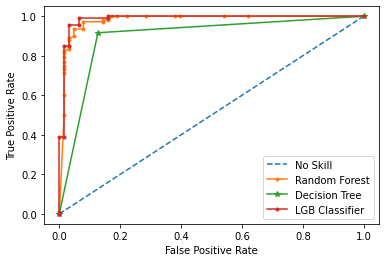

In [28]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
# fit a model

# predict probabilities
lr_probs = rfc.predict_proba(X_test)
lr_probs1 = dt.predict_proba(X_test)
lgb_probs1 = lgb_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probs1 = lr_probs1[:, 1]
lgb_probs1 = lgb_probs1[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
lr_auc1 = roc_auc_score(y_test, lr_probs1)
lgb_auc1 = roc_auc_score(y_test, lgb_probs1)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (lr_auc1))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
print('Light GBM: ROC AUC=%.3f' % (lgb_auc1))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
lr_fpr1, lr_tpr1, _ = roc_curve(y_test, lr_probs1)
lgb_fpr1, lgb_tpr1, _ = roc_curve(y_test, lgb_probs1)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
pyplot.plot(lr_fpr1, lr_tpr1, marker='*', label='Decision Tree')
pyplot.plot(lgb_fpr1, lgb_tpr1, marker='.', label='LGB Classifier')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()